In [50]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'D:\TheCoder\Kaggle\datasets\ames\ames.csv')

In [51]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900


In [65]:
features = ['YearBuilt', 'MoSold', 'ScreenPorch', 'LotArea']
#features = [col for col in df.columns]

col_ins_tranform=df.melt(id_vars='SalePrice', value_vars=features) #df.melt() if very important tranform from column to instance for certain purpose. Think about LOSSES MS
col_ins_tranform

,SalePrice,variable,value
0,215000,YearBuilt,1960.0
1,105000,YearBuilt,1961.0
2,172000,YearBuilt,1958.0
3,244000,YearBuilt,1968.0
4,189900,YearBuilt,1997.0
...,...,...,...
11715,142500,LotArea,7937.0
11716,131000,LotArea,8885.0
11717,132000,LotArea,10441.0
11718,170000,LotArea,10010.0


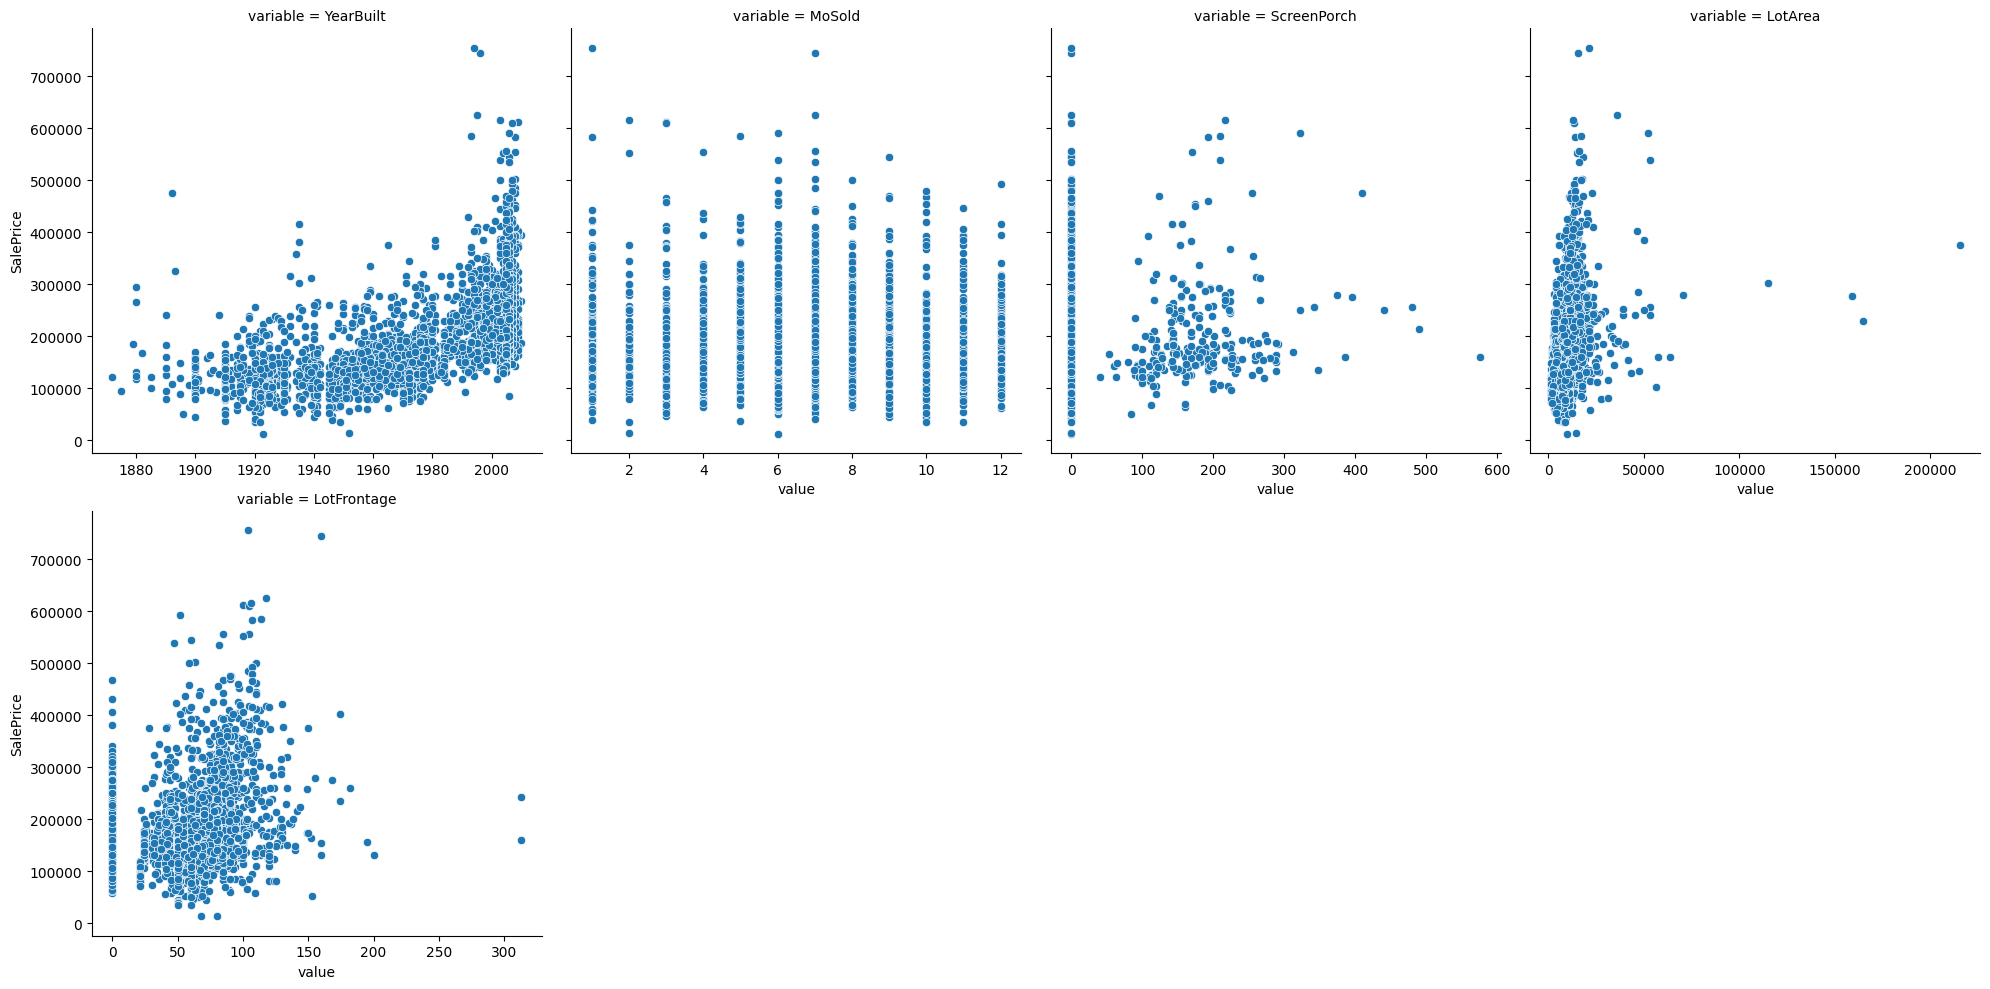

In [64]:
sns.relplot(
    x="value", y="SalePrice", col='variable', col_wrap=4, data=col_ins_tranform, facet_kws=dict(sharex=False),
);


__Based on above visualization:__
>Based on the plots, `YearBuilt` should have the highest `MI score` since knowing the year tends to constrain `SalePrice` to a smaller range of possible values. This is generally not the case for `MoSold`, however. Finally, since `ScreenPorch` is usually just one value, 0, on average it won't tell you much about `SalePrice` (though more than `MoSold`) .

**Based on above dataset:**
>The Ames dataset has seventy-eight features -- a lot to work with all at once! Fortunately, you can identify the features with the most potential.
>Use the `make_mi_scores` function (introduced in the tutorial) to compute mutual information scores for the Ames features:j>>
>